In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# データを用意する
w0 = 1.0                             # 定数
w1 = 1.0                             # 係数1
w2 = 2.0                             # 係数2
x = np.random.uniform(0, 10, 300)    # ノイズを含んだx軸を作成
y = np.random.uniform(0, 10, 300)    # ノイズを含んだy軸を作成
# ノイズを含んだ平面点列データを作成
z = w0 + (w1 * x) + (w2 * y) + np.random.uniform(0, 5, 300)

# ここからグラフ描画
# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'

# グラフの入れ物を用意する。
fig = plt.figure()
ax1 = Axes3D(fig)

# 軸のラベルを設定する。
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

# データプロットする。
ax1.scatter3D(x, y, z, label='Dataset')
plt.legend()

# グラフを表示する。
plt.show()
print("推定したい平面")
print("z = %f + %fx + %fy"%(w0,w1,w2))
#plt.close()


<Figure size 640x480 with 1 Axes>

推定したい平面
z = 1.000000 + 1.000000x + 2.000000y


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#データをインポート
with open("C:/Users/kozo/Documents/PYTHON/Least_squares/XXX_original-38765point_trt.xyz", "r") as f:
    dat = f.readlines()

le = len(dat)
xyz = np.zeros((le,3))

for i,li in enumerate(dat):
    li = li.replace(" \n","")
    data = li.split(" ")
    a,b,c = float(data[0]),  float(data[1]),  float(data[2])
    
    xyz[i] = [a,b,c]
print(xyz)
print(len(xyz))


[[ 0.252 -0.088 -0.002]
 [ 0.031 -0.056 -0.096]
 [ 0.112  0.071  0.002]
 ...
 [ 0.306  0.033 -0.049]
 [ 0.306  0.033 -0.042]
 [ 0.305  0.033 -0.054]]
38765


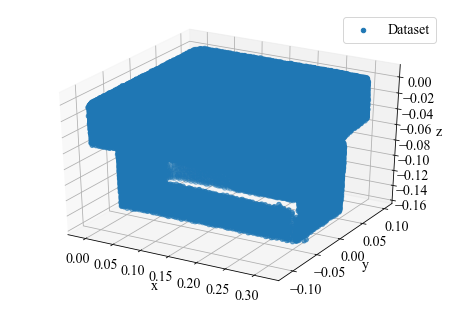

In [2]:
# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'

# グラフの入れ物を用意する。
fig = plt.figure()
ax1 = Axes3D(fig)

# 軸のラベルを設定する。
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

# データプロットする。
xyz_t = xyz.T
ax1.scatter3D(xyz_t[0], xyz_t[1], xyz_t[2] , label='Dataset')
plt.legend()

# グラフを表示する。
plt.show()
plt.close()

In [3]:
#基準平面の指定
S = "yz"
#精度の指定（デフォルト2000)
d = 2000

#基準面yzの場合の処理


#点群がとるx座標の最大値及び最小値
x_min, x_max = min(xyz_t[0]), max(xyz_t[0])
print(x_max)
print(x_min)

#x座標における点密度の平均値
x_age = int(len(xyz)/d)
print(x_age)

0.318
-0.009
19


4354
4354.0


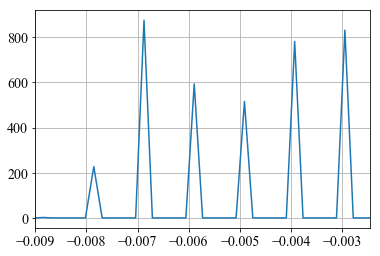

In [4]:
#反復施行で用いる変数、配列の定義
xidx = x_min
p_list0 = [] 
pcd, ix = np.zeros(d + 2), np.zeros(d + 2)
rge = float((x_max - x_min)/d)


#x座標が小さい面を構成している点群データのインデックスを取得
k, kk = 0, 0
for i in range(d + 2):
        
    for j,x in enumerate(xyz_t[0]):
        if ((xidx - rge) <= x and x < xidx):
            p_list0.append(j)
            pcd[i] += 1
            
    #点密度が平均を上回ったときにkk=1とする
    if pcd[i] > x_age:
        kk = 1
    #点密度が平均を下回った回数をkにキャッシュ
    elif (pcd[i] < x_age and kk == 1):
        k += 1
        #k > d*(1/50)となったら終了(最適化)
        if k > d*(1/50):
            break
        
    
    ix[i] = xidx
    xidx += rge
    
#検出した点群密度をグラフ表示
fig0, ax0 = plt.subplots()
ax0.plot(ix, pcd)
ax0.set_xlim(x_min, x_min + d*rge/50)
ax0.grid()

print(len(p_list0))
print(sum(pcd))
plt.show()
plt.close()

[[-0.009  0.031 -0.15 ]
 [-0.009  0.016 -0.148]
 [-0.008  0.019 -0.136]
 ...
 [-0.001  0.025 -0.058]
 [-0.001  0.035  0.   ]
 [-0.001  0.035 -0.058]]


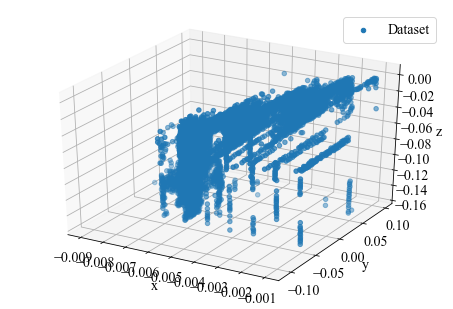

In [5]:
#検出した点群インデックス（p_list0)をつかって、新たな点群配列を作成
points0 = np.zeros((len(p_list0),3))

for i,idx in enumerate(p_list0):
    points0[i] = xyz[idx]

print(points0)

# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'

# グラフの入れ物を用意する。
fig1 = plt.figure()
ax1 = Axes3D(fig1)

# 軸のラベルを設定する。
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

# データプロットする。
xyz_t0 = points0.T
ax1.scatter3D(xyz_t0[0], xyz_t0[1], xyz_t0[2] , label='Dataset')
plt.legend()

# グラフを表示する。
plt.show()
plt.close()

4641
4641.0


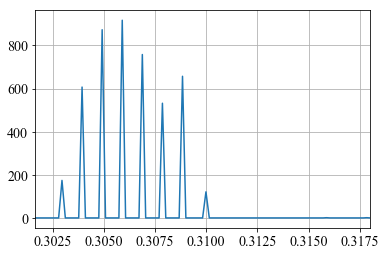

In [6]:
#反復施行で用いる変数、配列の定義
p_list1 = []
xidx = x_max
pcd, ix = np.zeros(d + 2), np.zeros(d + 2)
rge = float((x_max - x_min)/d)


#x座標が大きい面を構成している点群データのインデックスを取得
k, kk = 0, 0
for i in range(d + 2):
        
    for j,x in enumerate(xyz_t[0]):
        if (xidx < x and x <= xidx + rge):
            p_list1.append(j)
            pcd[d + 1 - i] += 1
            
    #点密度が平均を上回ったときにkk=1とする
    if pcd[d + 1 - i] > x_age:
        kk = 1
    #点密度が平均を下回った回数をkにキャッシュ
    elif (pcd[d + 1 - i] < x_age and kk == 1):
        k += 1
        #k > d*(1/50)となったら終了(最適化)
        if k > d*(1/50):
            break
        
    
    ix[d + 1 - i] = xidx
    xidx -= rge

#検出した点群密度をグラフ表示
fig2, ax2 = plt.subplots()
ax2.plot(ix, pcd)
ax2.set_xlim(x_max - d*rge/20, x_max)
ax2.grid()

print(len(p_list1))
print(sum(pcd))
plt.show()
plt.close()

[[ 0.318 -0.044 -0.151]
 [ 0.316 -0.046 -0.152]
 [ 0.31  -0.004 -0.077]
 ...
 [ 0.303  0.037 -0.059]
 [ 0.303  0.035 -0.058]
 [ 0.303  0.033 -0.057]]


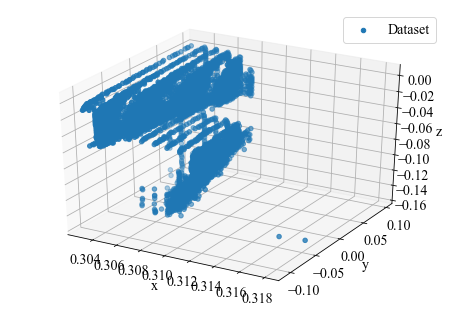

In [7]:
#検出した点群インデックス（p_list0)をつかって、新たな点群配列を作成
points1 = np.zeros((len(p_list1),3))

for i,idx in enumerate(p_list1):
    points1[i] = xyz[idx]

print(points1)

# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'

# グラフの入れ物を用意する。
fig3 = plt.figure()
ax3 =　(fig3)

# 軸のラベルを設定する。
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')

# データプロットする。
xyz1_t = points1.T
ax3.scatter3D(xyz1_t[0], xyz1_t[1], xyz1_t[2] , label='Dataset')
plt.legend()

# グラフを表示する。
plt.show()
plt.close()

In [8]:
#検出したデーターの統計を取る
n = len(points0)
sxyz = np.zeros(3)
sxyz2 = np.zeros(3)
sxyyz = np.zeros(3)

for xyz_i in points0:

    sxyz[0] += xyz_i[0]
    sxyz[1] += xyz_i[1]
    sxyz[2] += xyz_i[2]
    sxyz2[0] += xyz_i[0]*xyz_i[0]
    sxyz2[1] += xyz_i[1]*xyz_i[1]
    sxyz2[2] += xyz_i[2]*xyz_i[2]
    sxyyz[0] += xyz_i[0]*xyz_i[1]
    sxyyz[1] += xyz_i[1]*xyz_i[2]
    sxyyz[2] += xyz_i[2]*xyz_i[0]
    
#a+by+cz = x --> AX = Y
A = np.array([[n,       sxyz[1],  sxyz[2]],
            [sxyz[1], sxyz2[1], sxyyz[1]],
            [sxyz[2], sxyyz[1], sxyz2[2]]])

Y = np.array([sxyz[0], sxyyz[0], sxyyz[2]])


In [9]:
#LU分解
print(len(A))
ROW = 3

#配列の初期化
L = np.zeros((ROW,ROW))
U = np.zeros((ROW,ROW))
Ai = np.zeros((ROW,ROW))

Ai = np.copy(A)

for i in range(ROW):

    #LUに値を代入
    for k in range(ROW - i):
        L[ROW - (k + 1)][i] = Ai[ROW - (k + 1)][i]
        U[i][ROW - (k + 1)] = Ai[i][ROW - (k + 1)]/Ai[i][i]
        
        if i == (ROW - (k + 1)):
            U[i][ROW - (k + 1)] = 1
        
    #終了条件
    if (ROW - (i + 1)) == 0:
        break
        
    #＜アルゴリズム＞　Ai <-- Ai - l(1)*u(0)_T の変換はAi配列に直接変換値を代入している
    for j in range(ROW - (i + 1)):
        for m in range(ROW - (i + 1)):
            #Ai <-- Ai - l_1*u_T
            Ai[ROW - (1 + j)][ROW - (1 + m)] -=  L[ROW - (j + 1)][i]* U[i][ROW - (m + 1)]

print("L行列")
print(L)
print("\nU行列")
print(U)

#方程式の解
#一般解アルゴリズム
#AX = Y --> UX = B, LB = Y 

#ROW = 4
#Y = np.array([3,2,1,3])


#LB = Y
B = np.zeros(ROW)

for i in range(ROW):
    
    B[i] = Y[i]/L[i][i]
    if i == 0:
        continue
        
    for j in range(i):
        B[i] -= (L[i][i - j - 1]/L[i][i])*B[i - j - 1]

# UX = B
X = np.zeros(ROW)

for i in range(ROW):
    j = ROW - 1 - i
    
    X[j] = B[j]
    if i == 0:
        continue
    
    for k in range(i):
        X[j] -= U[j][ROW - (k + 1)]*X[ROW - (k + 1)]

        
print("\n方程式の解")
print(X)    
print("\nx = %f + %fy + %fz" %(X[0], X[1], X[2]))

3
L行列
[[ 4.35400000e+03  0.00000000e+00  0.00000000e+00]
 [-4.85120000e+01  9.87529628e+00  0.00000000e+00]
 [-2.69816000e+02 -3.40500264e-01  8.80093755e+00]]

U行列
[[ 1.         -0.01114194 -0.06196968]
 [ 0.          1.         -0.03448   ]
 [ 0.          0.          1.        ]]

方程式の解
[-0.00275824  0.00494777  0.030838  ]

x = -0.002758 + 0.004948y + 0.030838z


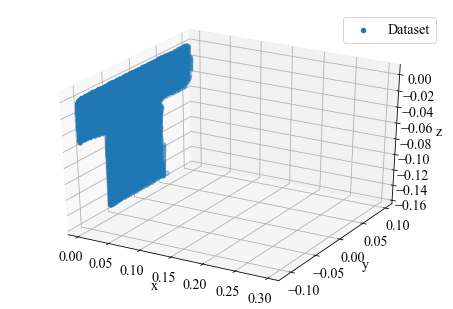

In [10]:
#平面に点群をそらせる
xyzk = np.zeros((len(points0), 3))

for i,p in enumerate(points0):
    xyzk[i][2] = p[2]
    xyzk[i][1] = p[1]
    xyzk[i][0] = X[0] + X[1]*p[1] + X[2]*p[2]
    
xyzk_t = xyzk.T
# グラフの入れ物を用意する。
fig4 = plt.figure()
ax4 = Axes3D(fig4)

# 軸のラベルを設定する。
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_zlabel('z')
ax4.set_xlim(-0.01, 0.31)
# データプロットする。
ax4.scatter3D(xyzk_t[0], xyzk_t[1], xyzk_t[2] , label='Dataset')
plt.legend()

# グラフを表示する。
plt.show()
plt.close()


38765


NameError: name 'xyz_new' is not defined

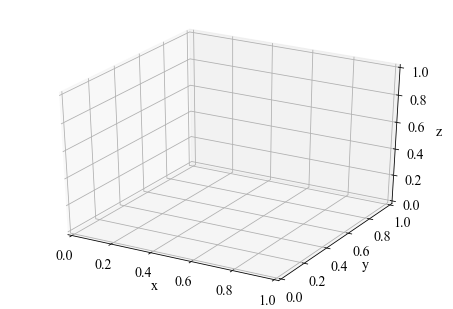

In [18]:
#平面をx=0にするために全ての点を回転移動
print(len(xyz))
xyz_copy = np.copy(xyz)
new_xyz = np.zeros((len(xyz),3))
xyz_copy[0] -= X[0]

radxy = np.pi/2 - np.arctan(1/X[1])
radxz = np.pi/2 - np.arctan(1/X[2])
sinxy, cosxy = np.sin(radxy), np.cos(radxy)
sinxz, cosxz = np.sin(radxz), np.cos(radxz)

for i,ex in enumerate(xyz):
    x,y,z = ex[0],ex[1],ex[2]
    
    new_xyz[i][0] = (x*cosxy - y*sinxy)*cosxz - z*sinxz
    new_xyz[i][1] = x*sinxy + y*cosxy
    new_xyz[i][2] = (x*cosxy - y*sinxy)*sinxz - z*cosxz

# グラフの入れ物を用意する。
fig5 = plt.figure()
ax5 = Axes3D(fig5)

# 軸のラベルを設定する。
ax5.set_xlabel('x')
ax5.set_ylabel('y')
ax5.set_zlabel('z')

# データプロットする。
new_xyz_t = new_xyz.T
ax5.scatter3D(xyz_new_t[0], xyz_new_t[1], xyz_new_t[2] , label='Dataset')
plt.legend()

# グラフを表示する。
plt.show()
plt.close()